In [385]:
import numpy as np
from latticegas import LatticeGas as latgas

In [300]:
# 5 - 1 variant
# 10 - 2 variant
# 15 - 3 variant
# 20 - 4 varinat
N = 5

In [366]:
n_x = 420
n_y = 180

n_step = 1000
step_frame = 1

xc = int(n_x/4)
yc = int(n_y/2)
r = int(n_y/9)

u_lb_min = 0.01
u_lb_max = 0.1
Re_min = 20
Re_max = 1000

xc, yc, r

(105, 90, 20)

In [367]:
u_lb = u_lb_min + 2*(u_lb_max - u_lb_min)/(N-1)
Re = int(Re_min + 2*(Re_max - Re_min)/(N-1))

u_lb, Re

(0.05500000000000001, 510)

In [368]:
parametrs = {'nx':n_x, 'ny':n_y, 'u_lb':u_lb, 'Re':Re}
obstacle = {'xc':xc, 'yc':yc, 'r':r}

In [369]:
model = latgas(parametrs, obstacle)

In [370]:
%%time
model.solve(n_step, step_frame)

Starting simulation for 1000 steps...
Parameters: nx=420, ny=180, u_lb=0.0550, Re=510
Viscosity: nu=0.002157, Relaxation: w=1.974448
Progress: 0.0% - Max velocity: 0.0550
Progress: 10.0% - Max velocity: 0.1707
Progress: 20.0% - Max velocity: 0.1723
Progress: 30.0% - Max velocity: 0.3134
Progress: 40.0% - Max velocity: 0.2718
Progress: 50.0% - Max velocity: 0.2674
Progress: 60.0% - Max velocity: 0.2844
Progress: 70.0% - Max velocity: 0.2639
Progress: 80.0% - Max velocity: 0.2627
Progress: 90.0% - Max velocity: 0.2960
Simulation completed!
CPU times: total: 54.7 s
Wall time: 57.8 s


In [371]:
density = np.array(model.field_den)
velocity = np.array(model.field_u)
pressure = np.array(model.field_p)
# u_x = np.array(model.field_ux)
# u_y = np.array(model.field_uy)

In [372]:
np.save('density_zen', density)
np.save('velocity_zen', velocity)
np.save('pressure_zen', pressure)
# np.save('data/ux', u_x)
# np.save('data/uy', u_y)

In [373]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [374]:
den = np.load('density_zen.npy')
vel = np.load('velocity_zen.npy')
pres = np.load('pressure_zen.npy')
# ux = np.load('data/ux.npy')
# uy = np.load('data/uy.npy')

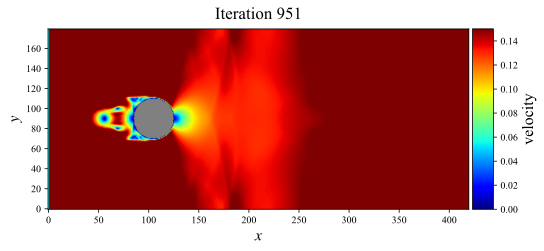

In [386]:
%config InlineBackend.figure_format = 'svg'
rc = {"font.family" : "serif",
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

from IPython.display import clear_output
import time

obstacle_mask = np.zeros((model.nx, model.ny), dtype=bool)
obstacle_mask[model.obstacle['x'], model.obstacle['y']] = True
obst = obstacle_mask.T

for j in range(0, min(n_step, len(vel)), 50):
    i = j

    clear_output(wait=True)

    fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
    divider = make_axes_locatable(ax)

    velocity = vel[i].T.copy()
    velocity[obst] = np.nan

    im = ax.imshow(velocity, cmap="jet", vmin=0, vmax=0.15)
    ax.invert_yaxis()
    ax.set_title(f'Iteration {(i+1)*step_frame}', fontsize=fs+1, pad=10)
    ax.set_xlabel(r'$x$', fontsize=fs)
    ax.set_ylabel(r'$y$', fontsize=fs)
    ax.set_facecolor("grey")

    cax = divider.append_axes('right', size='5%', pad=0.05)
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    cb.set_label(r"velocity", fontsize=fs)

    plt.show()

    time.sleep(0.5)

In [387]:
fig.savefig(f"velocity_{(i+1)*step_frame}.jpg")